# Sapphire A-type signal under review
In the sanfran expermint (the paper) we measured an increase of a-type signal.

This note tries to study why we did not measure the increase of signal in the last californium irradiation (californication expermint).

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from sanfran import creat2d,plot1d

Read data from SanFran expermint.

In [159]:
#1. counts_NoBaseline -> Remove estimated baseline (done roughly by eye and only works for 10 sec exposures)
#2. counts_normalized ->divide by power
df = pd.read_csv("DataFramForYossi/san_fran_pre_irrad_wheel5/SP_B1_003.csv","\t")
df["counts_NoBaseline"] = (df["counts"]-1351)
df["counts_normalized"] = df["counts_NoBaseline"] / df["power_av"]
df2 = pd.read_csv("DataFramForYossi/san_fran_post_irrad_wheel5/SP_B1_003.csv","\t")
df2["counts_NoBaseline"] = (df2["counts"]-1351)
df2["counts_normalized"] = df2["counts_NoBaseline"] / df2["power_av"]
diff = df.copy()
diff["counts"] = df2["counts_normalized"] - df["counts_normalized"]

# Californium irradiated SP_003
# 1. 2d Plot
Left plot are measuremnts at low emmision wavelengths and no filter for 250-340 excitation wavlengths.<br> 
Middle plot are measuremnts at high emmision wavelengths and no filter for 250-340 excitation wavlengths.<br> 
Right plot are measuremnts at high emmision wavelengths with filter.<br> 
Top three are befroe irradaition.<br> 
Middle is after.<br> 
Bottom is After-Before.<br> 

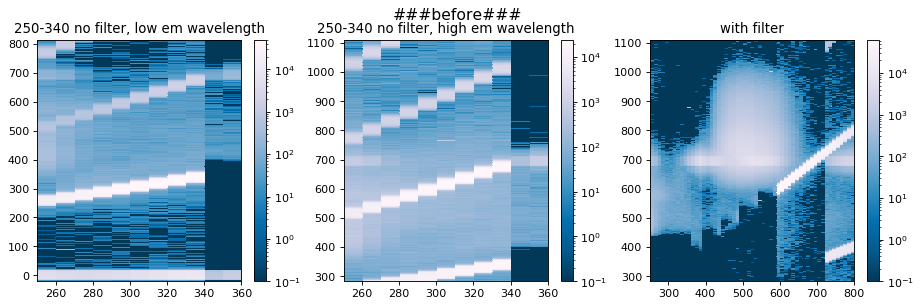

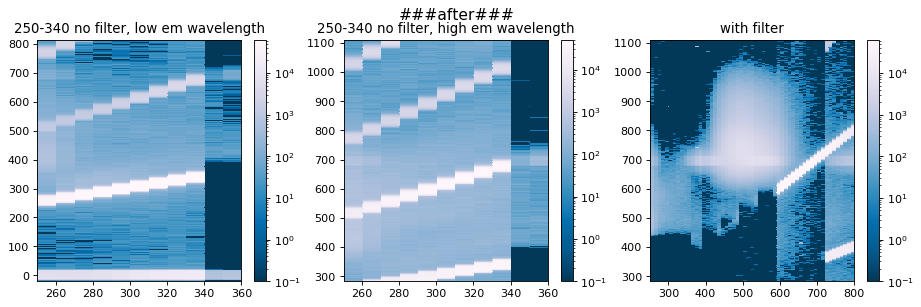

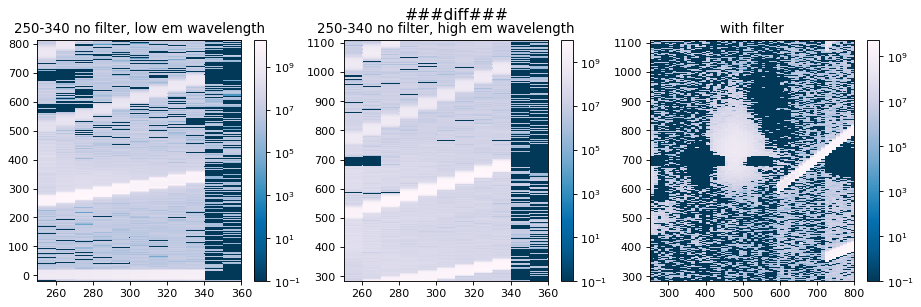

In [160]:
fig=plt.figure(1,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###before###', fontsize=14)
creat2d(df,counts="counts_NoBaseline")
fig=plt.figure(2,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###after###', fontsize=14)
creat2d(df2,counts="counts_NoBaseline")
fig=plt.figure(3,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###diff###', fontsize=14)
creat2d(diff,counts="counts")

In [166]:
def plot1d(df,df2,diff,ex_wl=250,exp_time=10,spectro_wl=400,lpf=0):
    before = df[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
    after = df2[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
    diff250nm = diff[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
    plt.subplot(1, 3, 1)
    plt.plot(after["em_wl"],  after["counts"],label = "after irr")
    plt.plot(before["em_wl"],  before["counts"],label = "before irr")
    plt.title("Raw")
    plt.legend()
    #plt.ylim([1300,2400])
    plt.yscale("log")
    plt.subplot(1, 3, 2)
    plt.plot(after["em_wl"],  after["counts_normalized"],label = "after irr")
    plt.plot(before["em_wl"],  before["counts_normalized"],label = "before irr")
    plt.title("(Raw - basline)/power")
    plt.yscale("log")
    plt.legend()
    plt.subplot(1, 3, 3)
    plt.plot(before["em_wl"],  diff250nm["counts"])
    plt.title("After - Before")
    plt.yscale("log")

# 2. 1d Plot focused on 250 Excitation

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing impo

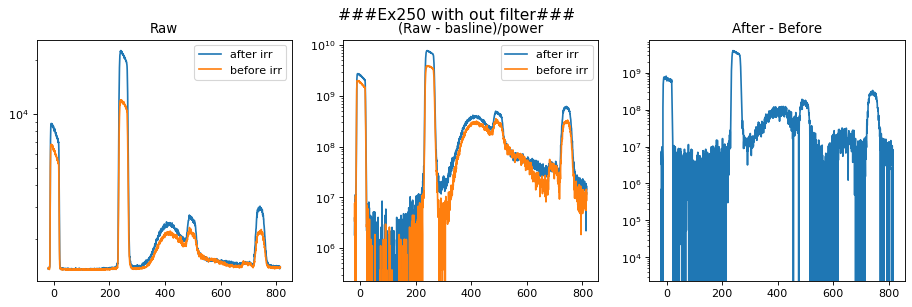

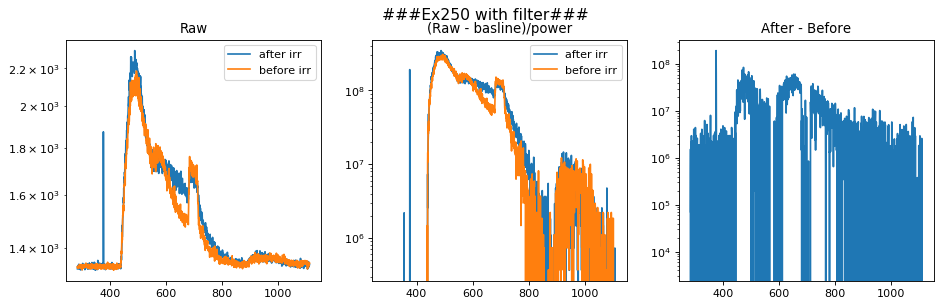

In [167]:
fig=plt.figure(1,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###Ex250 with out filter###', fontsize=14)
plot1d(df,df2,diff)
fig=plt.figure(2,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###Ex250 with filter###', fontsize=14)
plot1d(df,df2,diff,ex_wl=250,exp_time=10,spectro_wl=700,lpf=450)

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing impo

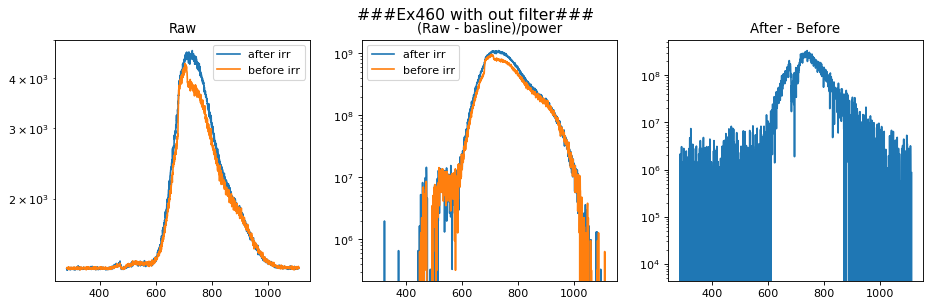

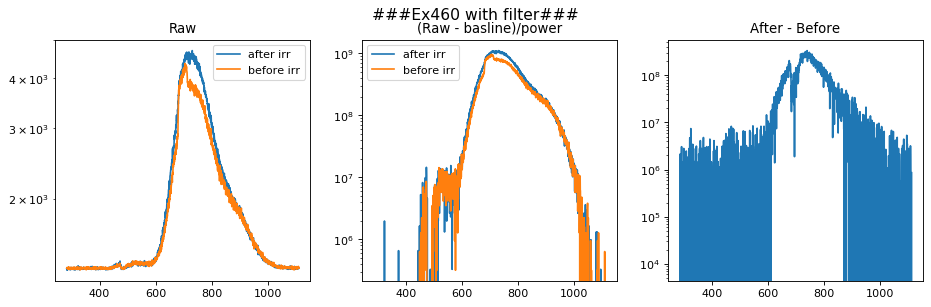

In [168]:
fig=plt.figure(1,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###Ex460 with out filter###', fontsize=14)
plot1d(df,df2,diff,ex_wl=460,exp_time=10,spectro_wl=700,lpf=500)
fig=plt.figure(2,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###Ex460 with filter###', fontsize=14)
plot1d(df,df2,diff,ex_wl=460,exp_time=10,spectro_wl=700,lpf=500)

# The shape looks like the oreintation is not the same in the pre and post.

# Measurments Taken 8th of june 2020
Here I latly retook measurmens of 250 nm excitation to diffrent crystals from both expermints

In [170]:
def plot_all(sp_list,title_list):
    for i,(name,title) in enumerate(zip(sp_list,title_list)):
        plt.subplot(len(sp_list),1, i+1)   
        #power = np.genfromtxt("Data/"+name+"_power.asc")
        spectrum = np.genfromtxt("Data/"+name+"_signal.asc",skip_header = 31).T
        plt.plot(spectrum[0,:],spectrum[1,:])
        plt.title(title)
        plt.yscale("log")
def plot_all_type2(sp_list,title_list):
    for i,(name,title) in enumerate(zip(sp_list,title_list)):
        #plt.subplot(len(sp_list),1, i+1)   
        #power = np.genfromtxt("Data/"+name+"_power.asc")
        spectrum = np.genfromtxt("Data/"+name+"_signal.asc",skip_header = 31).T
        plt.plot(spectrum[0,:],(spectrum[1,:]-spectrum[1,-1])/(108*10**-5),label = title)
        #plt.title(title)
        plt.legend()
        #plt.yscale("log")

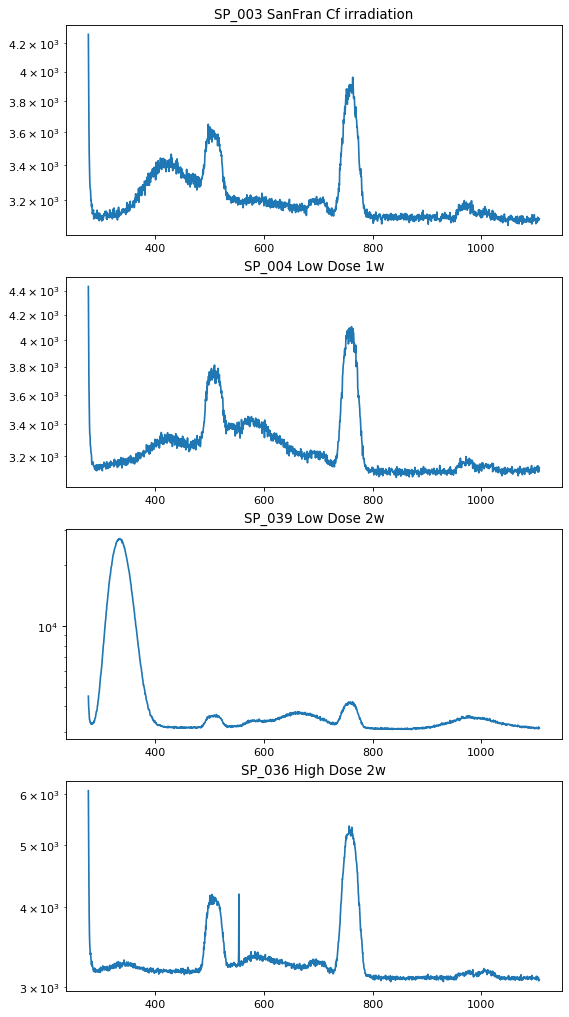

In [171]:
sp_list = ["SP_003","SP_004","SP_039","SP_036"]
title = ["SP_003 SanFran Cf irradiation","SP_004 Low Dose 1w","SP_039 Low Dose 2w","SP_036 High Dose 2w"]
fig=plt.figure(1,figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')
plot_all(sp_list,title)

# Measurments Taken 15th of june 2020
# Exploring the possibility of the A signal of being a results of oreintation.

Text(0.5, 1.0, '460 Ex')

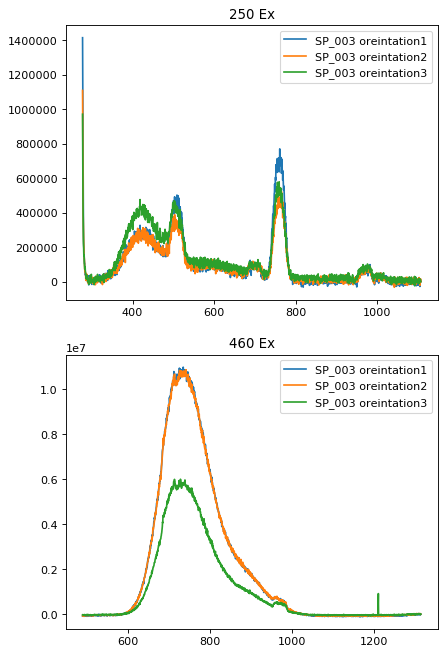

In [172]:
sp_list = ["SP_003_ex250_oreintation1_150620","SP_003_ex250_oreintation2_150620","SP_003_ex250_oreintation3_150620"]
title = ["SP_003 oreintation1","SP_003 oreintation2","SP_003 oreintation3"]
fig=plt.figure(1,figsize=(6, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1, 1)
plot_all_type2(sp_list,title)
plt.title("250 Ex")
sp_list = ["SP_003_ex460_oreintation1_150620","SP_003_ex460_oreintation2_150620","SP_003_ex460_oreintation3_150620"]
title = ["SP_003 oreintation1","SP_003 oreintation2","SP_003 oreintation3"]
plt.subplot(2,1, 2)
plot_all_type2(sp_list,title)
plt.title("460 Ex")

# It seems that Ex 250 Em 400 can be affected by oreintation. However 460 Ex 700 does not look the same as in San Fran expermint (see at top).
# Now another measurment to see that Ex 250 Em 330 is also affected by orientation

Text(0.5, 1.0, '460 Ex')

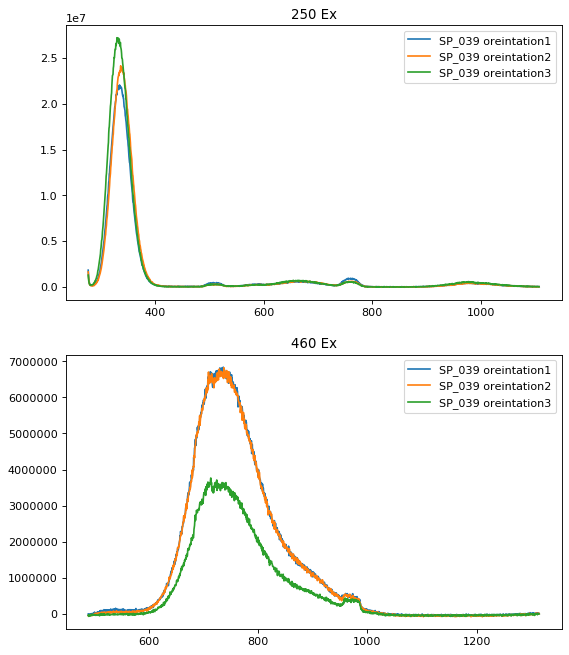

In [173]:
sp_list = ["SP_039_ex250_oreintation1_150620","SP_039_ex250_oreintation2_150620","SP_039_ex250_oreintation3_150620"]
title = ["SP_039 oreintation1","SP_039 oreintation2","SP_039 oreintation3"]
fig=plt.figure(1,figsize=(8, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1, 1) 
plt.title("250 Ex")
plot_all_type2(sp_list,title)
sp_list = ["SP_039_ex460_oreintation1_150620","SP_039_ex460_oreintation2_150620","SP_039_ex460_oreintation3_150620"]
title = ["SP_039 oreintation1","SP_039 oreintation2","SP_039 oreintation3"]
plt.subplot(2,1, 2)
plot_all_type2(sp_list,title)
plt.title("460 Ex")

# We thought maybe we can reproduce the sanfran results if we just try more orientation so we did.

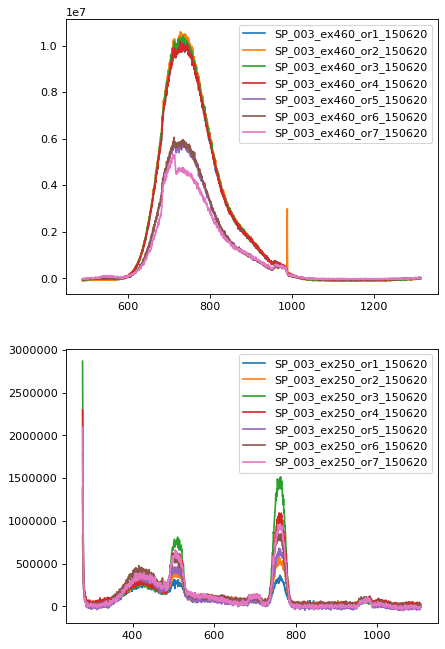

In [25]:
sp_list = ["SP_003_ex460_or1_150620","SP_003_ex460_or2_150620","SP_003_ex460_or3_150620","SP_003_ex460_or4_150620","SP_003_ex460_or5_150620","SP_003_ex460_or6_150620","SP_003_ex460_or7_150620"]
title = ["SP_003_ex460_or1_150620","SP_003_ex460_or2_150620","SP_003_ex460_or3_150620","SP_003_ex460_or4_150620","SP_003_ex460_or5_150620","SP_003_ex460_or6_150620","SP_003_ex460_or7_150620"]
fig=plt.figure(1,figsize=(6, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1, 1)
plot_all_type2(sp_list,title)
sp_list = ["SP_003_ex250_or1_150620","SP_003_ex250_or2_150620","SP_003_ex250_or3_150620","SP_003_ex250_or4_150620","SP_003_ex250_or5_150620","SP_003_ex250_or6_150620","SP_003_ex250_or7_150620"]
title = ["SP_003_ex250_or1_150620","SP_003_ex250_or2_150620","SP_003_ex250_or3_150620","SP_003_ex250_or4_150620","SP_003_ex250_or5_150620","SP_003_ex250_or6_150620","SP_003_ex250_or7_150620"]
plt.subplot(2,1, 2)
plot_all_type2(sp_list,title)

# Here you can see the or7 and or6 look exactly like in the paper. 
# It seems to me that we can conclude  the A signal at Ex 250 Em 400 as a mistake of oreintation.

### '''''''''From here I check what happened in the californication expermint. this is still work in progress''''''''

In [76]:
import glob
file_list = glob.glob("Californication/californication_spqz_pre_2019_06_22_03_52_20_485000/Sp/*crystal_*_signal*")
print(len(file_list))

864


In [49]:
file_list[0].spllit("_signal")[0] + "_power.asc"

AttributeError: 'str' object has no attribute 'spllit'

In [134]:
def get_data(f):
    power_file = f.split("_signal")[0] + "_power.asc"
    spectrum = np.genfromtxt(f,skip_header = 31).T
    power = np.genfromtxt(power_file,delimiter = ",").T
    state = int(f.split("state_")[1].split("_crys")[0])
    crystal = int(f.split("crystal_")[1].split("_ex_")[0])
    ex_wl = int(f.split("ex_wl_")[1].split("_exposure")[0])
    expo = float(f.split("exposure_")[1].split("_")[0])
    data = {"state":[state]*len(spectrum[0]),
        'ex_wl':[ex_wl]*len(spectrum[0]),
        'expo' :[expo]*len(spectrum[0]),
        'crystal':[crystal]*len(spectrum[0]),
        'em_wl': spectrum[0],
        'counts': spectrum[1],
        'power_avg': np.mean(power[1]),
        'power_std': np.std(power[1]),
        }
    return data
import glob
file_list = glob.glob("Californication/californication_spqz_pre_2019_06_22_03_52_20_485000/Sp/*crystal_*_signal*")
print(len(file_list))

data = get_data(file_list[0])
data = pd.DataFrame(data, columns = data.keys())
for f in file_list[1:]:
    data = get_data(f)
    df2 = pd.DataFrame(data, columns = data.keys())
    df = pd.concat([df,df2],ignore_index=True)

864


In [135]:
#df = pd.DataFrame(data, columns = data.keys())
df.to_csv("Californication/spqz_pre")

In [136]:
df["crystal"].unique()

array([5, 4, 6, 7])

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


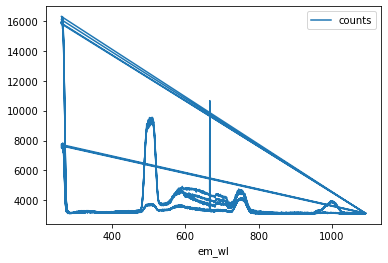

In [137]:
df[df["ex_wl"]==250][df["expo"]==10][df["crystal"]==5].plot(x = "em_wl",y="counts")

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


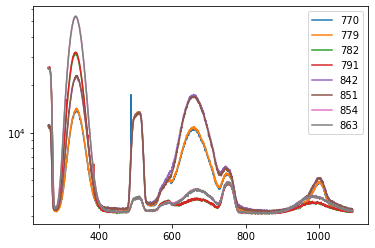

In [138]:
grouped = df[df["ex_wl"]==250][df["expo"]==10][df["crystal"]==7].groupby("state")
for name,group in grouped:
    plt.plot(group["em_wl"],group["counts"],label = name)
plt.yscale("log")
plt.legend()

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


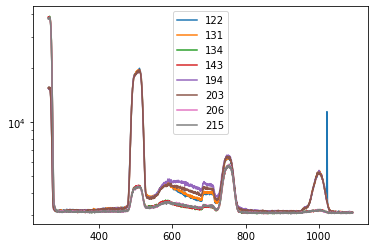

In [102]:
grouped = df[df["ex_wl"]==250][df["expo"]==10][df["crystal"]==4].groupby("state")
for name,group in grouped:
    plt.plot(group["em_wl"],group["counts"],label = name)
plt.yscale("log")
plt.legend()

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


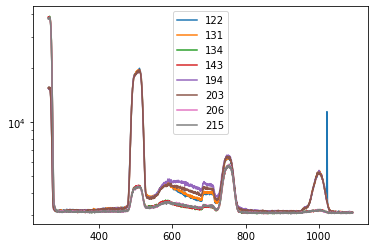

In [99]:
grouped = df[df["ex_wl"]==250][df["expo"]==10][df["crystal"]==4].groupby("state")
for name,group in grouped:
    plt.plot(group["em_wl"],group["counts"],label = name)
plt.yscale("log")
plt.legend()

In [28]:
spectrum = np.genfromtxt(file_list[0],skip_header = 31).T
power = np.genfromtxt(file_list[1],delimiter = ",").T

In [146]:
df = pd.read_hdf("/home/weiss/workdir/CCAnalsys/Californication/SpQz_post2.h5", "Data/Scans/Crystals")
df = df.astype({'counts': 'int32'})

In [154]:
df2["crystal"].unique()

array([ 5,  7,  8,  9, 10, 11], dtype=int8)

In [148]:
df.dtypes

looparound       bool
crystal          int8
grating          int8
exp_index        int8
slit_width      int16
state           int32
exposure      float16
ex_wl         float16
power         float64
em_wl         float16
counts          int32
dtype: object

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


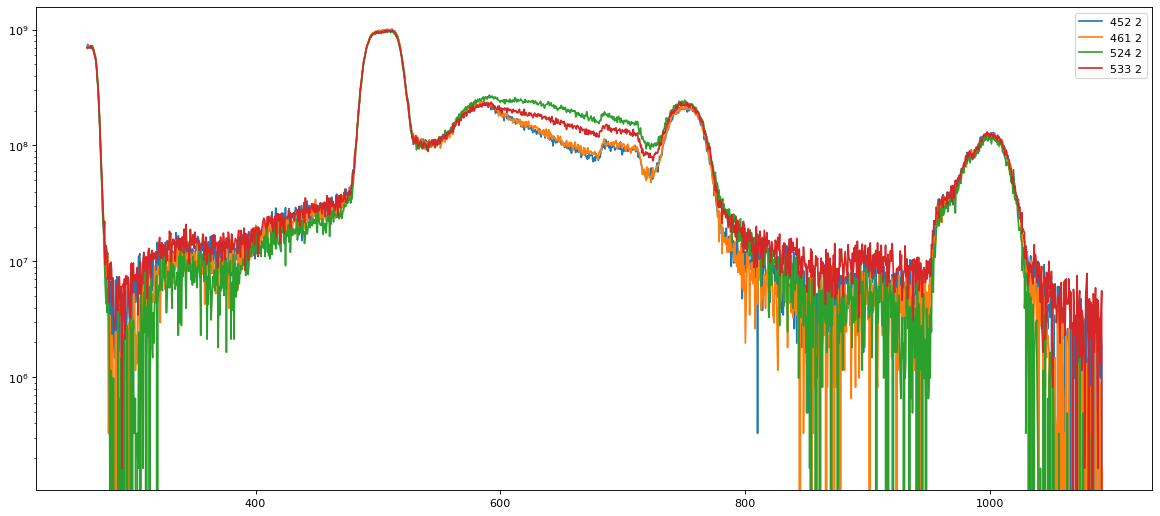

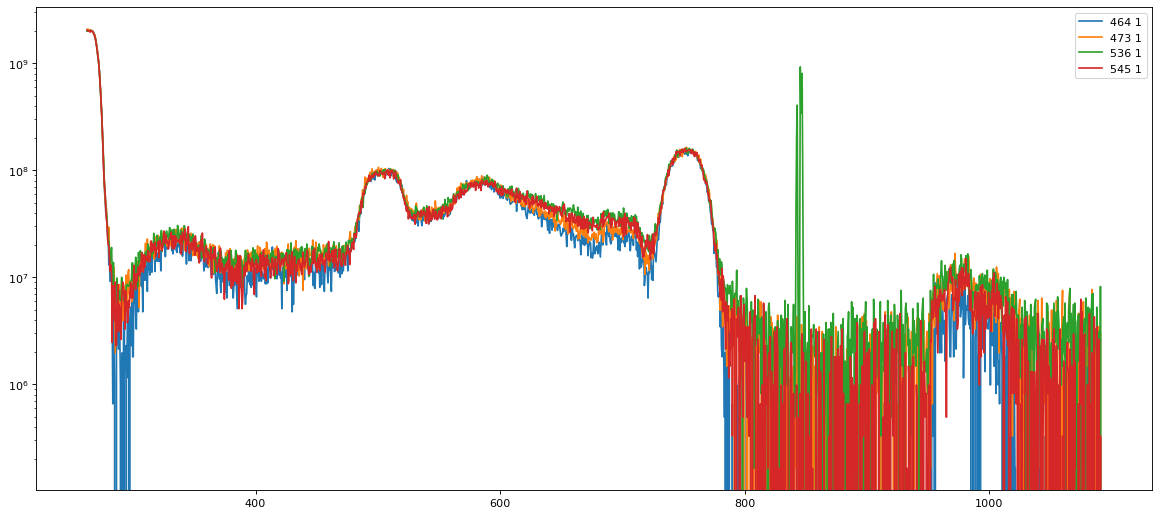

In [149]:
grouped = df[df["ex_wl"]==250][df["exposure"]>=9][df["crystal"]==7].groupby("state")
for name,group in grouped:
    name = str(name)+" " +str(group["grating"].iloc[1])
    if  group["grating"].iloc[1] == 1:
        fig=plt.figure(1,figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    else :
        fig=plt.figure(12,figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(group["em_wl"],(group["counts"]- group["counts"].values[-1])/group["power"],label = name)
    plt.yscale("log")
    plt.legend()

In [150]:
df2 = pd.read_hdf("/home/weiss/workdir/CCAnalsys/Californication/SpQz_pre.h5", "Data/Scans/Crystals")
df2 = df.astype({'counts': 'int32'})

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


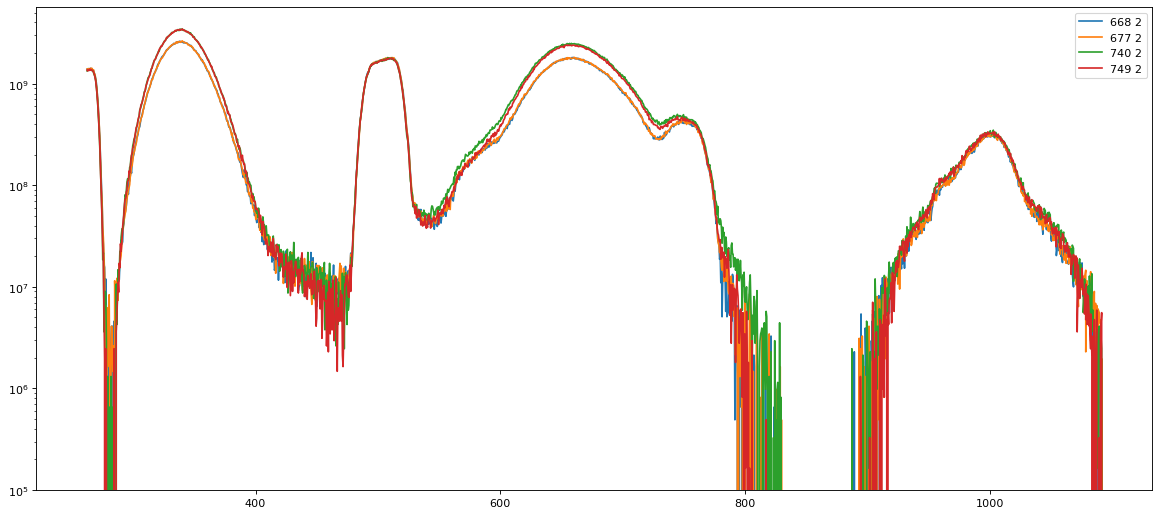

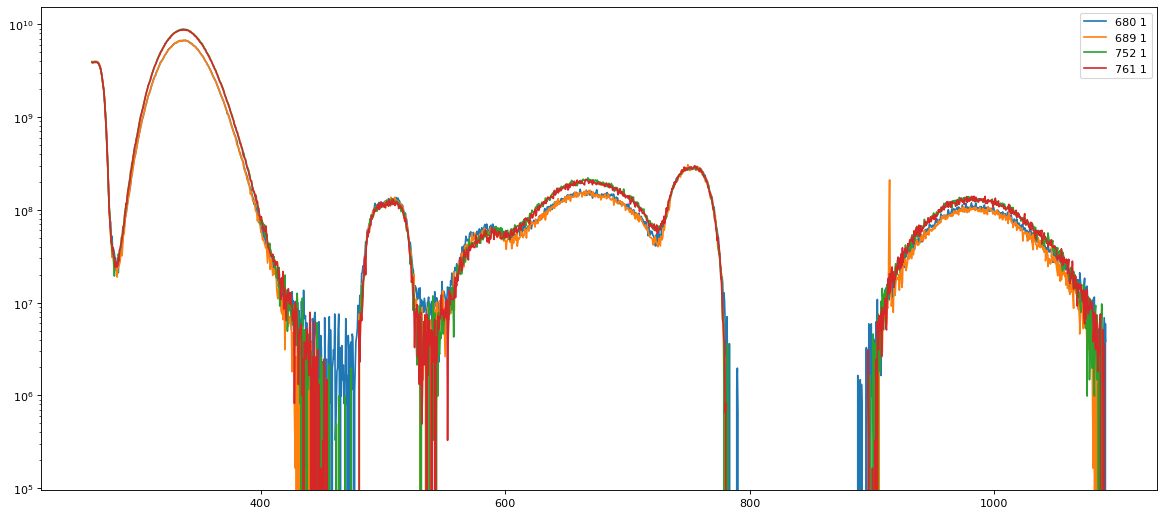

In [155]:
grouped = df2[df2["ex_wl"]==250][df2["exposure"]>=9][df2["crystal"]==8].groupby("state")
for name,group in grouped:
    name = str(name)+" " +str(group["grating"].iloc[1])
    if  group["grating"].iloc[1] == 1:
        fig=plt.figure(1,figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    else :
        fig=plt.figure(12,figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(group["em_wl"],(group["counts"]- group["counts"].values[-1])/group["power"],label = name)
    plt.yscale("log")
    plt.legend()

In [152]:
df2

,looparound,crystal,grating,exp_index,slit_width,state,exposure,ex_wl,power,em_wl,counts
0,False,5,2,0,1000,114,0.099976,275.0,0.000008,287.75,3396
1,False,5,2,0,1000,114,0.099976,275.0,0.000008,288.25,3380
2,False,5,2,0,1000,114,0.099976,275.0,0.000008,288.75,3373
3,False,5,2,0,1000,114,0.099976,275.0,0.000008,289.50,3410
4,False,5,2,0,1000,114,0.099976,275.0,0.000008,290.00,3379
...,...,...,...,...,...,...,...,...,...,...,...
2073595,True,11,1,1,1000,1409,10.000000,250.0,0.000006,1090.00,3097
2073596,True,11,1,1,1000,1409,10.000000,250.0,0.000006,1090.00,3076
2073597,True,11,1,1,1000,1409,10.000000,250.0,0.000006,1091.00,3106
2073598,True,11,1,1,1000,1409,10.000000,250.0,0.000006,1091.00,3118
